### Tensor flow exercise

In this exercise, we would use Keras api with the wrapper of tensorflow to build a simple Feed forward NN with 3 layers 

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


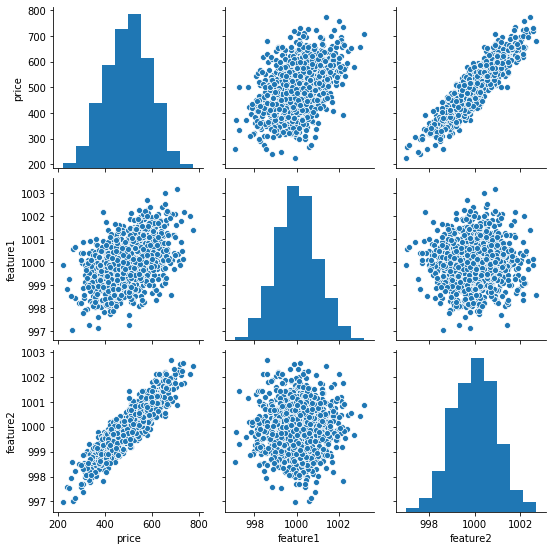

In [4]:
sns.pairplot(df)

There seems to be high correlation between price and feature 2.  

In [5]:
X = df[['feature1', 'feature2']].values
y = df[['price']].values

In [6]:
#X

In [7]:
#y

##### Dividing data into training and test data set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [10]:
print('train data size: ' + str(X_train.shape))
print('test data size: ' + str(X_test.shape))

train data size: (700, 2)
test data size: (300, 2)


#### Standardizing dataset in order to have input values in the range of [0,1]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max_scaler = MinMaxScaler() 

In [13]:
### fitting it on training data set 
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [15]:
print('min value in training data set: ' + str(X_train_scaled.min()))
print('max value in training data set: ' + str(X_train_scaled.max()))

min value in training data set: 0.0
max value in training data set: 1.0


#### Keras API

In [16]:
import tensorflow as tf

C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '

In [17]:
tf.__version__

'1.9.0'

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
tf.keras.datasets

<module 'tensorflow.keras.datasets' from 'C:\\Users\\anshulkumar.singh\\AppData\\Local\\Continuum\\anaconda3\\envs\\tensorflow_cpu\\lib\\site-packages\\tensorflow\\keras\\datasets\\__init__.py'>

In [20]:
#help(Dense)

In [21]:
from tensorflow.keras import datasets

In [22]:
## Type 1
model = Sequential([Dense(4, activation='relu'),
                    Dense(2,activation='relu'),
                    Dense(1)])


In [23]:
model

In [24]:
## Type 2

model = Sequential()

# input layer

model.add(tf.keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]))
model.add(Dense(4, activation='relu')) # input layer
model.add(Dense(4, activation='relu')) # Hidden layer 1
model.add(Dense(4, activation='relu')) # Hidden layer 2

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse') ## setting optimizer and loss calculation function  

In [25]:
## fitting model
model.fit(x = X_train_scaled, y=y_train, epochs=250)

Epoch 1/250
700/700 [==============================] - 0s 402us/step - loss: 256128.4229
Epoch 2/250
700/700 [==============================] - 0s 33us/step - loss: 255834.2515
Epoch 3/250
700/700 [==============================] - 0s 34us/step - loss: 255516.7439
Epoch 4/250
700/700 [==============================] - 0s 34us/step - loss: 255153.8172
Epoch 5/250
700/700 [==============================] - 0s 31us/step - loss: 254741.2829
Epoch 6/250
700/700 [==============================] - 0s 35us/step - loss: 254274.5558
Epoch 7/250
700/700 [==============================] - 0s 34us/step - loss: 253748.4463
Epoch 8/250
700/700 [==============================] - 0s 33us/step - loss: 253160.4616
Epoch 9/250
700/700 [==============================] - 0s 30us/step - loss: 252506.9312
Epoch 10/250
700/700 [==============================] - 0s 34us/step - loss: 251783.3713
Epoch 11/250
700/700 [==============================] - 0s 34us/step - loss: 250980.4206
Epoch 12/250
700/700 [=======

700/700 [==============================] - 0s 37us/step - loss: 1646.9029
Epoch 94/250
700/700 [==============================] - 0s 34us/step - loss: 1612.4432
Epoch 95/250
700/700 [==============================] - 0s 31us/step - loss: 1572.8486
Epoch 96/250
700/700 [==============================] - 0s 31us/step - loss: 1534.6683
Epoch 97/250
700/700 [==============================] - 0s 36us/step - loss: 1496.7716
Epoch 98/250
700/700 [==============================] - 0s 33us/step - loss: 1460.8329
Epoch 99/250
700/700 [==============================] - 0s 40us/step - loss: 1420.8921
Epoch 100/250
700/700 [==============================] - 0s 37us/step - loss: 1384.6091
Epoch 101/250
700/700 [==============================] - 0s 34us/step - loss: 1351.8584
Epoch 102/250
700/700 [==============================] - 0s 38us/step - loss: 1318.0655
Epoch 103/250
700/700 [==============================] - 0s 33us/step - loss: 1284.1149
Epoch 104/250
700/700 [=============================

700/700 [==============================] - 0s 33us/step - loss: 24.1986
Epoch 188/250
700/700 [==============================] - 0s 34us/step - loss: 24.3670
Epoch 189/250
700/700 [==============================] - 0s 31us/step - loss: 24.5659
Epoch 190/250
700/700 [==============================] - 0s 33us/step - loss: 24.6239
Epoch 191/250
700/700 [==============================] - 0s 34us/step - loss: 24.2348
Epoch 192/250
700/700 [==============================] - 0s 30us/step - loss: 24.3498
Epoch 193/250
700/700 [==============================] - 0s 38us/step - loss: 24.2937
Epoch 194/250
700/700 [==============================] - 0s 28us/step - loss: 24.3909
Epoch 195/250
700/700 [==============================] - 0s 33us/step - loss: 24.1396
Epoch 196/250
700/700 [==============================] - 0s 50us/step - loss: 24.8477
Epoch 197/250
700/700 [==============================] - 0s 46us/step - loss: 24.0357
Epoch 198/250
700/700 [==============================] - 0s 38us/ste

In [26]:
df_loss = pd.DataFrame(model.history.history)

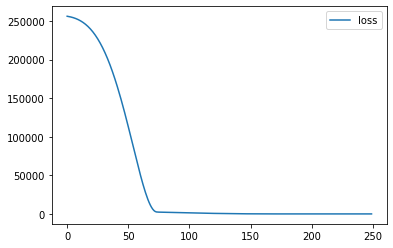

In [27]:
df_loss.plot()

In [28]:
model.evaluate(x= X_test_scaled, y= y_test)

300/300 [==============================] - 0s 139us/step


24.958726374308267

In [29]:
model.evaluate(x= X_train_scaled, y= y_train)

700/700 [==============================] - 0s 14us/step


23.903708332606723

In [30]:
preds = model.predict(X_test_scaled)

print(type(preds))

preds = pd.Series(preds.reshape( y_test.shape[0], ))

print(type(preds))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [31]:
df_preds = pd.DataFrame(y_test, columns=['True Y'])

df_preds = pd.concat([df_preds, preds], axis=1)

In [32]:
df_preds.columns = ['True Y', 'Pred Y']

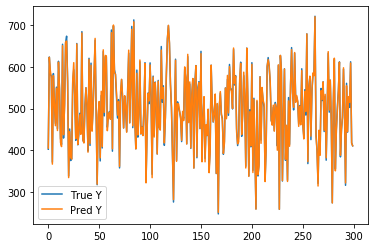

In [33]:
df_preds.plot()

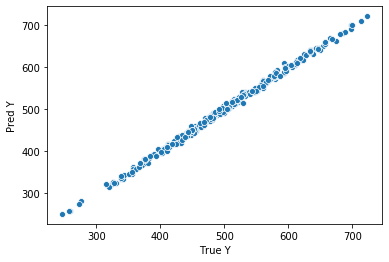

In [34]:
sns.scatterplot(x = 'True Y', y = 'Pred Y', data = df_preds)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
mean_squared_error(df_preds['True Y'], df_preds['Pred Y'])

24.958729707942695

In [37]:
mean_absolute_error(df_preds['True Y'], df_preds['Pred Y'])

3.999064991461517

In [38]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [39]:
### accuracy 1 %
mean_absolute_error(df_preds['True Y'], df_preds['Pred Y'])/df.describe().loc['mean', 'price']

0.008019413040058028

In [40]:
### mean square error
mean_squared_error(df_preds['True Y'], df_preds['Pred Y'])**0.5

4.995871266149949

In [41]:
### new values 

new_val = [[1000, 900]]

In [42]:
new_val = min_max_scaler.transform(new_val)

In [43]:
model.predict(new_val)

array([[14.0259905]], dtype=float32)

In [44]:
model.save('my_tf_model.h5')

In [45]:
from tensorflow.keras.models import load_model

In [46]:
my_model = load_model('my_tf_model.h5')

### Thank you 